In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetic_data.csv')


In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
# df.info()

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


##  1. Data cleaning and transformation

###  A.) Show the shape of the dataframe. Replace all missing values with the numpy.nan.

In [6]:
df.shape

(101766, 50)

In [7]:
conditions = [
    (df['diag_1'] >= '250' ) & (df['diag_1'] < '251' )
]
values = ['1']
df['Diabetic'] = np.select(conditions, values)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetic
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [8]:
# Replacing All the missing values(indicated by '?' by 'NaN')

newdf = df.replace('?',np.NaN)

newdf

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetic
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,1
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,0


###  B.) Drop all columns that have more than 50% of missing values. You can also drop columns for which over 95% of their values are the same.

In [9]:
newdf.isnull().head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetic
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

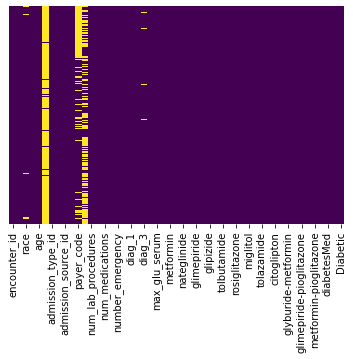

In [10]:
sns.heatmap(newdf.isnull(), yticklabels = False, cbar= False, cmap= 'viridis')

In [11]:
# Here we can clearly see there are 3 columns having Null Values more than 50%

#### Visualizing columns with respect to 'encounter_id', showing the missing values in 'weight', 'payer_code' & 'medical_specialty' column. 


In [12]:
import plotly.express as px

def count_rows(rows):
    return len(rows)

In [13]:
by_cross1 = df.groupby(['weight','encounter_id']).apply(count_rows)
by_cross2 = df.groupby(['payer_code','encounter_id']).apply(count_rows)
by_cross3 = df.groupby(['medical_specialty','encounter_id']).apply(count_rows)

pivot1 = by_cross1.unstack()
pivot2 = by_cross2.unstack()
pivot3 = by_cross3.unstack()


<AxesSubplot:xlabel='encounter_id', ylabel='weight'>

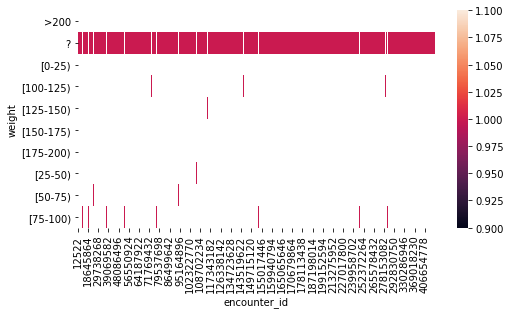

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(pivot1 , annot= False)

<AxesSubplot:xlabel='encounter_id', ylabel='payer_code'>

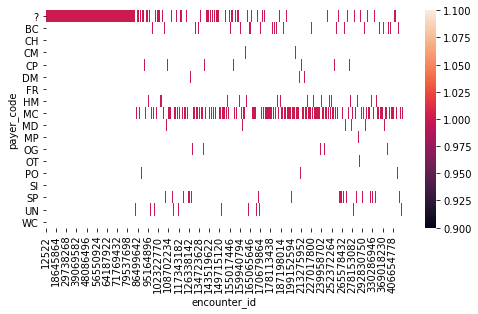

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(pivot2 , annot= False)

<AxesSubplot:xlabel='encounter_id', ylabel='medical_specialty'>

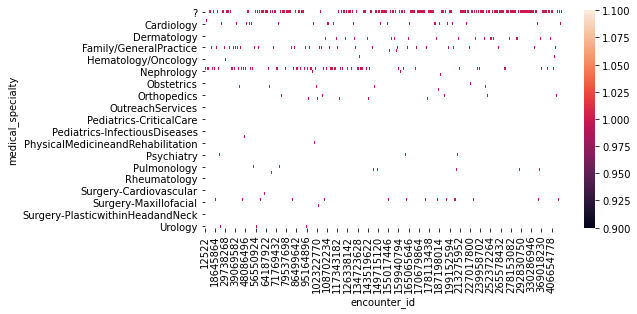

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(pivot3 , annot= False)

In [17]:
# Removing 3 columns which have more than 50% Missing Values.

In [18]:
newdf.drop(['weight','payer_code','medical_specialty'], axis = 1 ,inplace = True)
newdf

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetic
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,1
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,Down,No,No,No,No,No,Ch,Yes,>30,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [19]:
newdf = newdf.fillna({
        'diag_1':0,
        'diag_2':0,
        'diag_3':0
})

## E.) Drop all rows with missing values.

In [20]:
newdf = newdf.dropna()
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99493 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              99493 non-null  int64 
 1   patient_nbr               99493 non-null  int64 
 2   race                      99493 non-null  object
 3   gender                    99493 non-null  object
 4   age                       99493 non-null  object
 5   admission_type_id         99493 non-null  int64 
 6   discharge_disposition_id  99493 non-null  int64 
 7   admission_source_id       99493 non-null  int64 
 8   time_in_hospital          99493 non-null  int64 
 9   num_lab_procedures        99493 non-null  int64 
 10  num_procedures            99493 non-null  int64 
 11  num_medications           99493 non-null  int64 
 12  number_outpatient         99493 non-null  int64 
 13  number_emergency          99493 non-null  int64 
 14  number_inpatient     

## F.) Identify all numerical features and form a list of numerical features and another for the remaining categorical features.

In [21]:
# newdf.dtypes

In [22]:
newdf.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.949300e+04,9.949300e+04,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000,99493.000000
mean,1.650261e+08,5.456413e+07,2.027248,3.740856,5.770949,4.398420,43.072588,1.340577,16.026605,0.373353,0.201341,0.643101,7.439217
std,1.024026e+08,3.866461e+07,1.450857,5.309393,4.072913,2.986977,19.695858,1.703717,8.119790,1.276799,0.939977,1.271365,1.926064
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.461624e+07,2.346008e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.525887e+08,4.598436e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.295403e+08,8.779702e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [23]:
# There are 13 Numerical Columns and Remaining 34 are Categorical Values.

### G.) Identify outliers in the numerical columns and remove them. To keep it simple,
### you may decide to only keep values that are within 3 standard deviations away from the
### mean for each feature of the dataset.

####  i)Removing Outliers from time_in_hospital

In [24]:
newdf.time_in_hospital.describe()

count    99493.000000
mean         4.398420
std          2.986977
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

In [25]:
upper_limit1 = newdf.time_in_hospital.mean() + newdf.time_in_hospital.std()
upper_limit1

7.385396760228307

In [26]:
lower_limit1 = newdf.time_in_hospital.mean() - newdf.time_in_hospital.std()
lower_limit1

1.411443218463662

In [27]:
# Total Outlier Values in time_in_hospital
newdf[(newdf.time_in_hospital > upper_limit1 ) | (newdf.time_in_hospital < lower_limit1) ].shape

(28856, 48)

In [28]:
df_no_outlier_std_dev = newdf[(newdf.time_in_hospital < upper_limit1) & (newdf.time_in_hospital > lower_limit1)]
df_no_outlier_std_dev.shape

(70637, 48)

####  ii)Removing Outliers from number_diagnoses

In [29]:
newdf.number_diagnoses.describe()

count    99493.000000
mean         7.439217
std          1.926064
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: number_diagnoses, dtype: float64

In [30]:
upper_limit2 = newdf.number_diagnoses.mean() + newdf.number_diagnoses.std()
upper_limit2

9.365280697851285

In [31]:
lower_limit2 = newdf.number_diagnoses.mean() - newdf.number_diagnoses.std()
lower_limit2

5.513152960798069

In [32]:
# Total Outlier Values in num_medications
newdf[(newdf.number_diagnoses > upper_limit2 ) | (newdf.number_diagnoses < lower_limit2) ].shape

(20158, 48)

####  > No. of Rows deleted of Outliers for number_diagnoses by 3 standard deviations Rule.

In [33]:
df_no_outlier_std_dev = newdf[(newdf.number_diagnoses < upper_limit2) & (newdf.number_diagnoses > lower_limit2)]
df_no_outlier_std_dev.shape

(79335, 48)

####  iii)Removing Outliers from num_medications

In [34]:
newdf.num_medications.describe()

count    99493.000000
mean        16.026605
std          8.119790
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

In [35]:
upper_limit = newdf.num_medications.mean() + newdf.num_medications.std()
upper_limit

24.14639523039856

In [36]:
lower_limit = newdf.num_medications.mean() - newdf.num_medications.std()
lower_limit

7.906814543153347

In [37]:
# Total Outlier Values in num_medications
newdf[(newdf.num_medications > upper_limit ) | (newdf.num_medications < lower_limit) ].shape

(23929, 48)

In [38]:
df_no_outlier_std_dev = newdf[(newdf.num_medications < upper_limit) & (newdf.num_medications > lower_limit)]
df_no_outlier_std_dev.shape

(75564, 48)

####  > No. of Rows deleted of Outliers for num_medications by 3 standard deviations Rule.

In [39]:
newdf.shape[0] - df_no_outlier_std_dev.shape[0]

23929

### H.) Remove duplicates in the column patient_nbr and show the shape of the resulting dataframe.

In [40]:
# Total Values in patient_nbr column
newdf['patient_nbr'].shape

(99493,)

In [41]:
# After removing Duplicate Values in patient_nbr column
man = newdf['patient_nbr'].unique()
man.shape

(69668,)

# 2.) Data Exploration

In [42]:
# Performing Data Binning operation on "readmitted" Column

In [43]:
'''  Hint 3: You may want to transform the readmitted column values to be 0 if the value is -->
NO and 1 otherwise for a better exploration of the data. 
'''

'  Hint 3: You may want to transform the readmitted column values to be 0 if the value is -->\nNO and 1 otherwise for a better exploration of the data. \n'

In [44]:
dummy = pd.get_dummies(newdf['readmitted'])
dummy.head()

# pd.get_dummies(df['readmitted'])

,<30,>30,NO
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [45]:
newdf = pd.concat((newdf,dummy), axis = 1 )

In [46]:
newdf['NO'].replace(1,0, inplace = True)
newdf

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetic,<30,>30,NO
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,NO,1,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,Ch,Yes,>30,0,0,1,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,Yes,NO,0,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,Ch,Yes,NO,0,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,Ch,Yes,NO,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,No,No,Ch,Yes,>30,1,0,1,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,No,No,No,Yes,NO,0,0,0,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,No,Ch,Yes,NO,0,0,0,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,No,Ch,Yes,NO,0,0,0,0


In [47]:
# Creating new columns for "re-admitted" , with Numerical Values, after Data Binning.

newdf['new_readmitted'] = newdf['<30'].astype(int) + newdf['>30'].astype(int) + newdf['NO'].astype(int)
newdf

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetic,<30,>30,NO,new_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,NO,1,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Ch,Yes,>30,0,0,1,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,Yes,NO,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Ch,Yes,NO,0,0,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Ch,Yes,NO,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,No,Ch,Yes,>30,1,0,1,0,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,No,No,Yes,NO,0,0,0,0,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,No,Ch,Yes,NO,0,0,0,0,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,No,Ch,Yes,NO,0,0,0,0,0


### A.) Age has a higher impact on re-admission

In [48]:
def count_rows(rows):
    return len(rows)

In [49]:
by_cross = newdf.groupby(['new_readmitted','age']).apply(count_rows)
# by_cross
pivot = by_cross.unstack()
pivot

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
new_readmitted,,,,,,,,,,
0,131,420,877,2102,5218,9409,11734,13144,8654,1628
1,29,262,734,1597,4247,7486,10254,12325,8146,1096


<AxesSubplot:xlabel='age', ylabel='new_readmitted'>

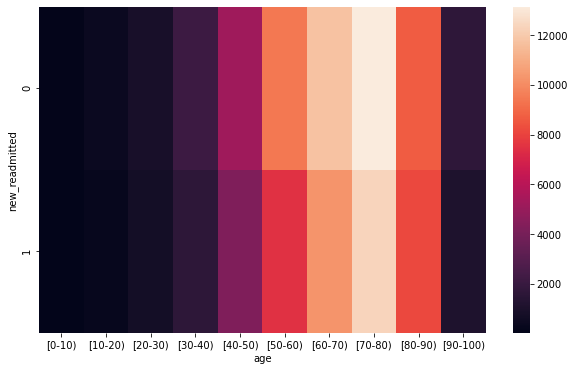

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot , annot= False)

In [51]:
#  Here from the above heatmap we can clearly see that "70-80 Age-Group", was mostly Re-Admitted.
#  This Age has a Higher impact on Re-Admission.

### B.) African-Americans are more likely to be re-admitted than other ethnic groups

In [52]:
by_cross = newdf.groupby(['race','new_readmitted']).apply(count_rows)
# by_cross
pivot = by_cross.unstack()
pivot

new_readmitted,0,1
race,,
AfricanAmerican,10421,8789
Asian,415,226
Caucasian,40383,35716
Hispanic,1183,854
Other,915,591


<AxesSubplot:xlabel='new_readmitted', ylabel='race'>

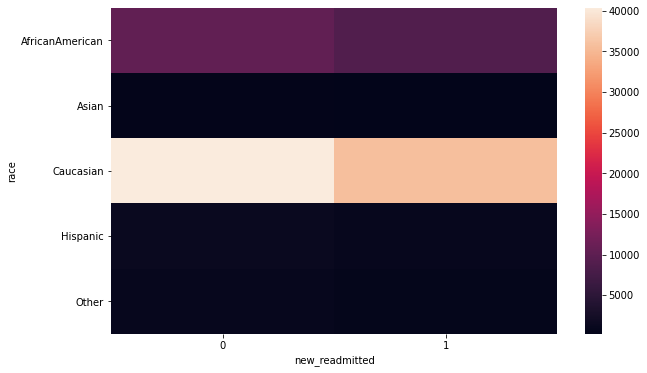

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot , annot= False)

In [54]:
# The above HeatMap shows that the Caucasian Race is more likely to be re-admitted than other ethnic groups.

### C.) Women patients are more likely to be re-admitted than men

In [55]:
by_cross = newdf.groupby(['gender','new_readmitted']).apply(count_rows)
# by_cross
pivot = by_cross.unstack()
pivot

new_readmitted,0,1
gender,,
Female,28257.0,25318.0
Male,25059.0,20858.0
Unknown/Invalid,1.0,NaN


<AxesSubplot:xlabel='new_readmitted', ylabel='gender'>

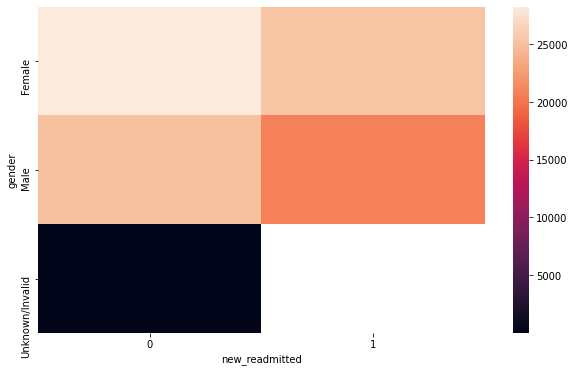

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot , annot= False)

In [57]:
# From the above HeatMap we can clearly see that Women patients are more likely to be re-admitted than men.

### D.) Diagnose types have a higher impact on re-admission rates. For this purpose, you need to take into account the icd_codes and plot say diag_1 vs readmitted

In [58]:
icd = pd.read_csv('icd_codes.csv')
# icd.shape

In [59]:
by_cross = newdf.groupby(['diag_1','new_readmitted']).apply(count_rows)
# by_cross
pivot = by_cross.unstack()
# pivot

<AxesSubplot:xlabel='new_readmitted', ylabel='diag_1'>

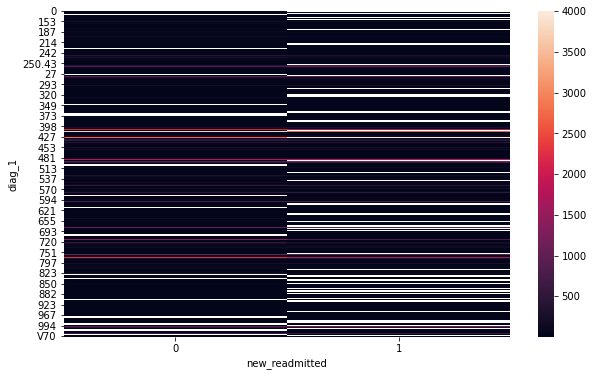

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot , annot= False)

In [61]:
# newdf[['diag_1', 'diag_2', 'diag_3', 'new_readmitted']]
# icd[icd['Description'] == 'Diabetes mellitus']
# icd[(icd['ICD_Code'] >= '250') & ( icd['ICD_Code'] < '251') ]

In [62]:
newdf.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Diabetic,<30,>30,NO,new_readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,NO,1,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Ch,Yes,>30,0,0,1,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,Yes,NO,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Ch,Yes,NO,0,0,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Ch,Yes,NO,0,0,0,0,0


In [63]:
by_cross = newdf.groupby(['Diabetic','age']).apply(count_rows)
# by_cross
pivot = by_cross.unstack()
pivot

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
Diabetic,,,,,,,,,,
0,25,215,946,2809,8051,15455,20641,24142,16042,2599
1,135,467,665,890,1414,1440,1347,1327,758,125


<AxesSubplot:xlabel='age', ylabel='Diabetic'>

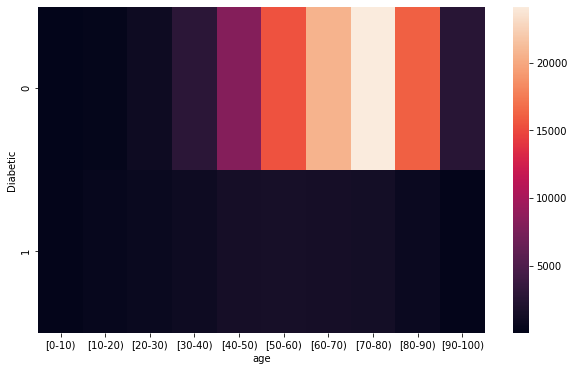

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot , annot= False)

In [65]:
# sns.regplot(x='Diabetic',y = 'new_readmitted', data = newdf)
# plt.ylim(0,)

In [ ]:
# Most occuring- Admitted Age Group

<BarContainer object of 10 artists>

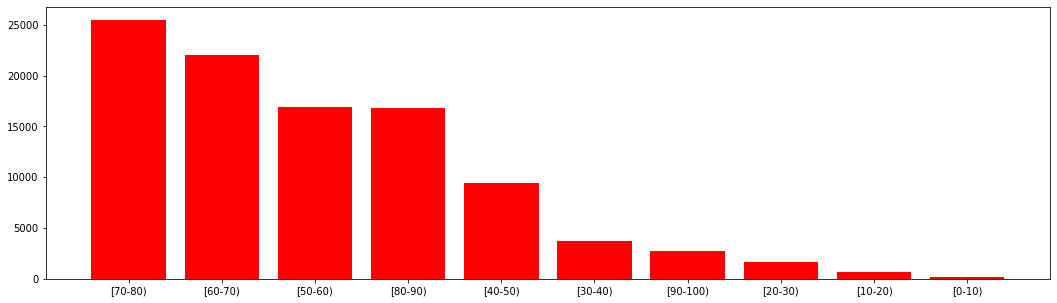

In [103]:
age2 = newdf['age'].value_counts()[0:11].keys()

plt.figure(figsize=(18,5))
plt.bar(list(newdf['age'].value_counts()[0:20].keys()), list(newdf['age'].value_counts()[0:20]), color = 'red')

## Model building

In [66]:
import sklearn as sk

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()

In [69]:
x = newdf[['new_readmitted']]
y = newdf[['Diabetic']]

In [70]:
lm.fit(x,y)

LinearRegression()

In [96]:
yhat = lm.predict(x)
yhat

array([[0.07832399],
       [0.09511435],
       [0.07832399],
       ...,
       [0.07832399],
       [0.07832399],
       [0.07832399]])

In [98]:
newdf.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  